## Intoduction

#### Nesse dataset vamos trabalhar com dois objetivos:


###### Objetivo1  : previsao do alcance Eletrico (Eletric Range) com base em outras variaveis.
###### Problema : 
Prever o alcance eletrico de um veiculo com base nas variaveis disponiveis.
Para essa abordagem vamos usar modelos de regressao linear ou regressao de floresta aleatoria, para prever o valor da variavel "eletric range" com base nas demais variaveis.



#### Objetivo 2 : Classificacao da elegebilidade CAFV (Clean Alternative Fuel Vehicle) com base nas caracteristicas do veiculo.

###### Problema: 
Classificar se um veiculo e elegivel como CLean Alternative Fuel Vheicle (CAFV) com base nas caracteristicas do veiculo.
Para essa abordagem vamos utilizar modelos de classificao, como arvores de decisao ou maquinas de vetores de suporte (SVM), para prever a elegibilidade CAFV com base nas variaveis disponiveis.

#### Importing the required libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Reading the csv file.
eletric= pd.read_csv("Electric_Vehicle_Population_Data.csv")

### Exploratory Data Analysis

In [104]:
eletric.head()

VIN (1-10)    County               City State  Postal Code  Model Year  \
0  2C4RC1N71H    Kitsap          Bremerton    WA      98311.0        2017   
1  2C4RC1N7XL   Stevens           Colville    WA      99114.0        2020   
2  KNDC3DLCXN    Yakima             Yakima    WA      98908.0        2022   
3  5YJ3E1EA0J    Kitsap  Bainbridge Island    WA      98110.0        2018   
4  1N4AZ1CP7J  Thurston           Tumwater    WA      98501.0        2018   

       Make     Model                   Electric Vehicle Type  \
0  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       KIA       EV6          Battery Electric Vehicle (BEV)   
3     TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4    NISSAN      LEAF          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              33   
1            Clean Alternative Fuel Vehicle Eligible              32   
2  Eligibility unknown as battery range has not b...               0   
3            Clean Alternative Fuel Vehicle Eligible             215   
4            Clean Alternative Fuel Vehicle Eligible             151   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  23.0       349437882   
1          0                   7.0       154690532   
2          0                  14.0       219969144   
3          0                  23.0       476786887   
4          0                  35.0       201185253   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.6466274 47.6341188)  PUGET SOUND ENERGY INC       5.303509e+10  
1     POINT (-117.90431 48.547075)             AVISTA CORP       5.306595e+10  
2  POINT (-120.6027202 46.5965625)              PACIFICORP       5.307700e+10  
3  POINT (-122.5235781 47.6293323)  PUGET SOUND ENERGY INC       5.303509e+10  
4     POINT (-122.89692 47.043535)  PUGET SOUND ENERGY INC       5.306701e+10

In [105]:
# Type of values in each column
eletric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [106]:
eletric.shape


(159467, 17)

##### Identifying the number of missing values in each column.

In [107]:
# Identifying the number of missing values in each column.
eletric.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [108]:
eletric.duplicated().sum()

0

In [109]:
eletric.nunique().sum()

174461

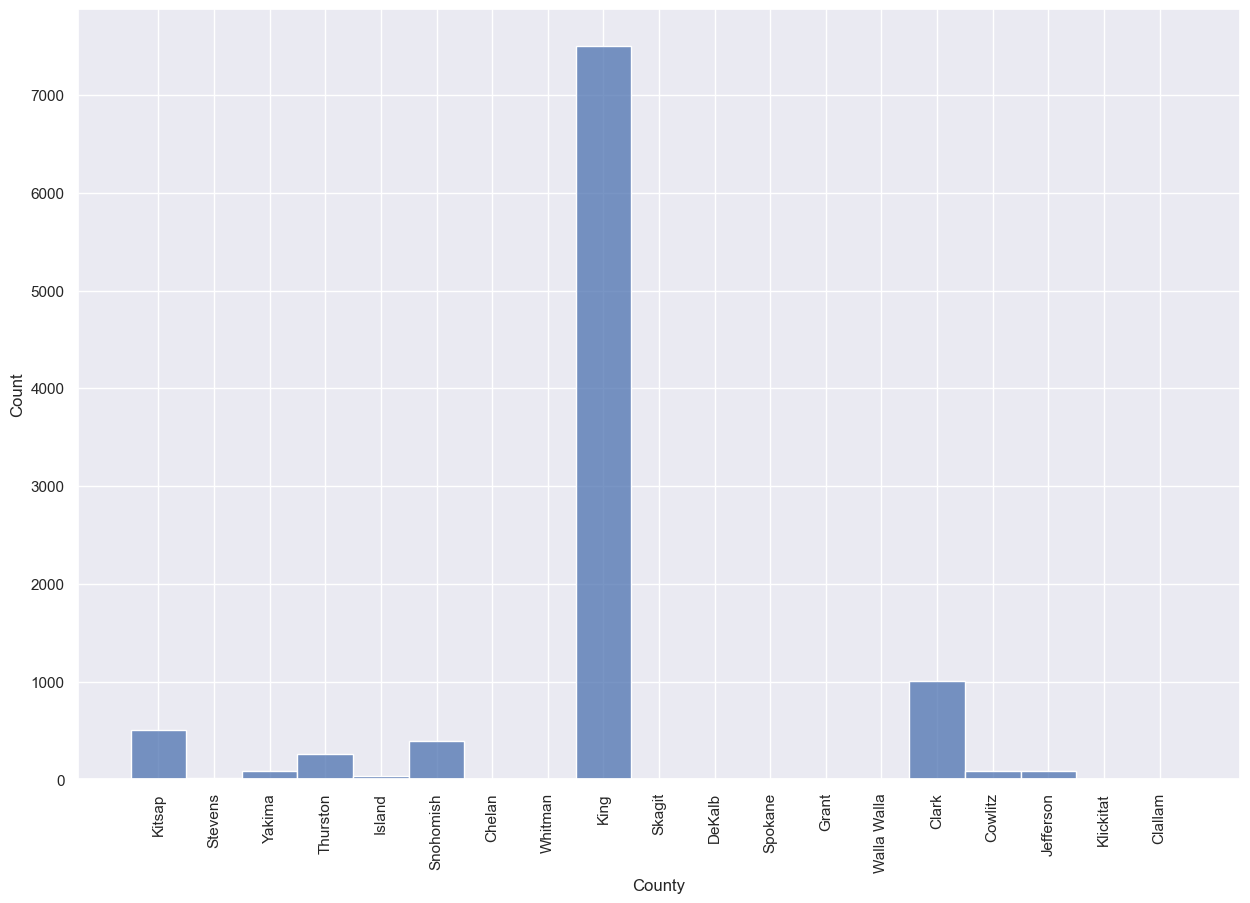

In [110]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(eletric['County'][0:10000])
plt.xticks(rotation ="vertical")
plt.show()

In [111]:
eletric['Base MSRP'].value_counts()

0         156043
69900       1430
31950        392
52900        217
32250        147
54950        129
59900        129
39995        117
36900        101
44100         94
45600         85
64950         84
33950         72
52650         69
34995         65
36800         56
55700         50
53400         36
98950         21
110950        21
81100         20
90700         20
102000        16
75095         12
184400        10
43700         10
89100          6
109000         6
91250          5
32995          3
845000         1
Name: Base MSRP, dtype: int64

In [112]:
eletric.describe()

Postal Code     Model Year  Electric Range     Base MSRP  \
count  159463.000000  159467.000000   159467.000000  159467.00000   
mean    98170.373635    2020.192510       64.283319    1227.63716   
std      2453.354932       3.010564       94.634277    8930.03468   
min      1730.000000    1997.000000        0.000000       0.00000   
25%     98052.000000    2018.000000        0.000000       0.00000   
50%     98122.000000    2021.000000       14.000000       0.00000   
75%     98370.000000    2023.000000       84.000000       0.00000   
max     99577.000000    2024.000000      337.000000  845000.00000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         159106.000000    1.594670e+05       1.594630e+05  
mean              29.261675    2.140242e+08       5.297287e+10  
std               14.843878    7.959275e+07       1.621526e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.731016e+08       5.303301e+10  
50%               33.000000    2.198450e+08       5.303303e+10  
75%               43.000000    2.448363e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [113]:
media_base_msrp = eletric['Base MSRP'].mean()
print(f"Mean 'Base MSRP': {media_base_msrp}")

Mean 'Base MSRP': 1227.6371600393811


In [114]:
eletric['Electric Range'].value_counts()

0      77195
215     6359
220     4063
84      3965
25      3752
       ...  
95         3
74         3
11         2
59         1
57         1
Name: Electric Range, Length: 102, dtype: int64

##### We see here in this chart possible outiliers in 7 columns.

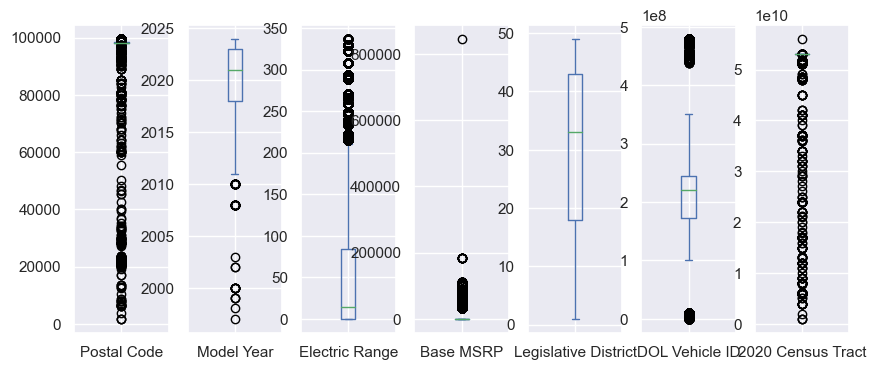

In [115]:
eletric.plot(kind='box', figsize=(10,4),subplots=True);

#### Identifying the total numbers of zero in the dataset

In [116]:
total_zeros = (eletric == 0).sum().sum()
print(f"Number of zeros: {total_zeros}")

Number of zeros: 233238


In [117]:
zeros_por_coluna = eletric.eq(0).sum()


print("Númber of zeros per column:")
print(zeros_por_coluna)

Númber of zeros per column:
VIN (1-10)                                                0
County                                                    0
City                                                      0
State                                                     0
Postal Code                                               0
Model Year                                                0
Make                                                      0
Model                                                     0
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        77195
Base MSRP                                            156043
Legislative District                                      0
DOL Vehicle ID                                            0
Vehicle Location                                          0
Electric Utility                                          0
2020 Census 

##### These counts provide insights, into the distribuition of vehicle elegibility based on battery range in a given dataset, this information can be used to understand the proportion of different categories in the sample.



In [118]:
eletric['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligibility unknown as battery range has not been researched    77195
Clean Alternative Fuel Vehicle Eligible                         63824
Not eligible due to low battery range                           18448
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64




#### This code creates a bar plot using seaborn, to visualize the count of cars for each manufacturer in the dataset.
#### It labels each bar, with the corresponding count and provides an interpretion, indicating that Tesla is the top manufacturer among the total 38 companies based on the number of cars in the dataset.









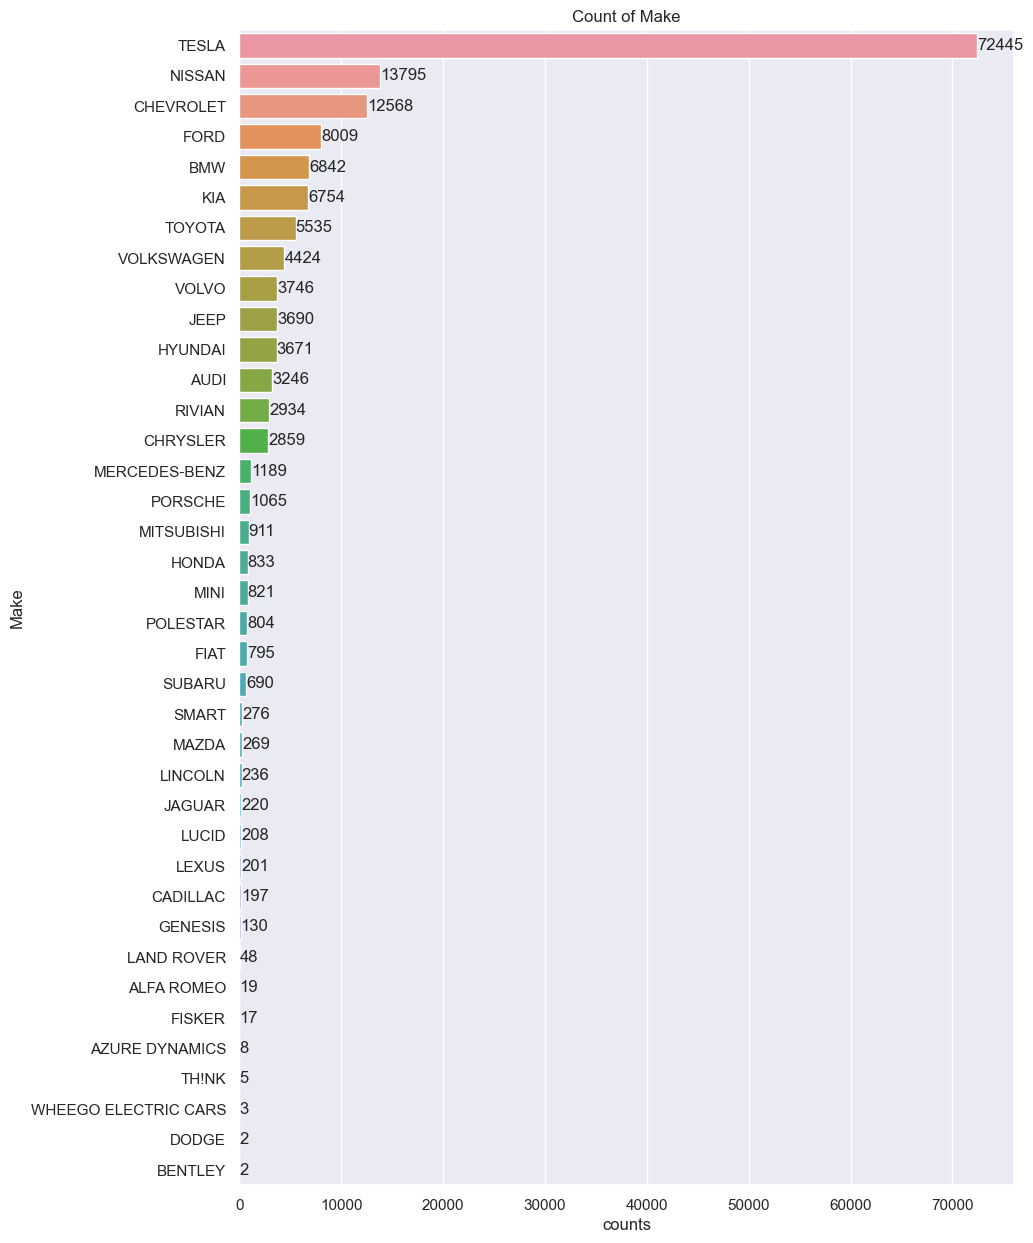

In [119]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Make').size().reset_index(name="counts").sort_values('counts', ascending=False), 
              y='Make', x='counts')
ax.set(title="Count of Make") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    

# Tesla is by far the top manufacturer among total 38 companies, in terms of numbers of cars in this dataset.



#### This code creates a bar plot using seaborn, to visualize the count of cars for each manufacturer in the dataset.
#### It labels each bar, with the corresponding count and provides an interpretion, indicating that TEsla is Mainly represented by Model Y and Model 3, whereas Nissan is represented by Leaf. 




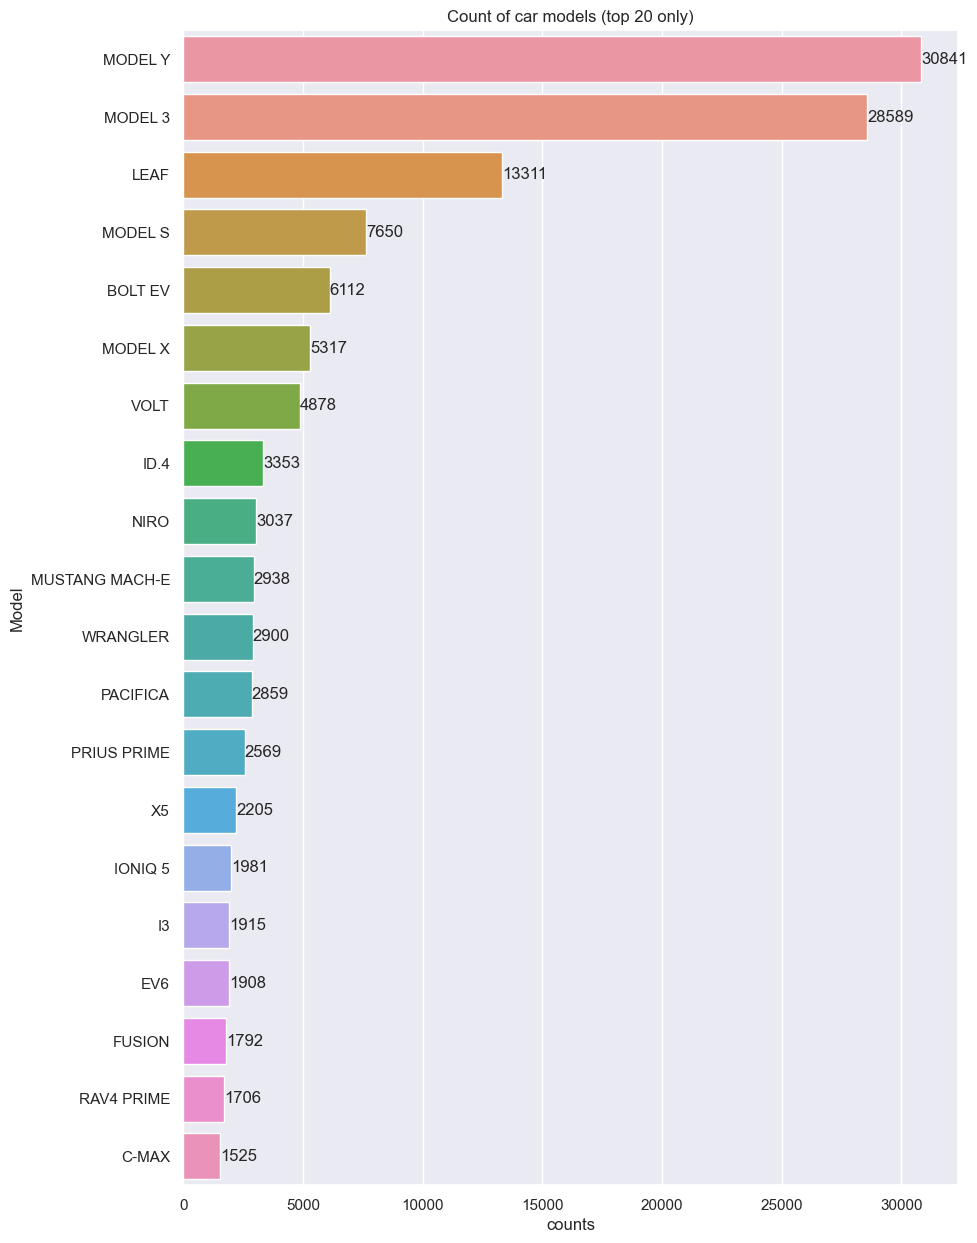

In [120]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Model').size().reset_index(name="counts").sort_values('counts', ascending=False).head(20), 
              y='Model', x='counts')
ax.set(title="Count of car models (top 20 only)") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    

# TEsla is mainly represented by MODEL Y and MODEL 3 , whereas Nissan from Leaf.




#### These counts provide insights into the distribution of eletric vehicles based on their types in the dataset.





In [121]:
eletric['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            124153
Plug-in Hybrid Electric Vehicle (PHEV)     35314
Name: Electric Vehicle Type, dtype: int64

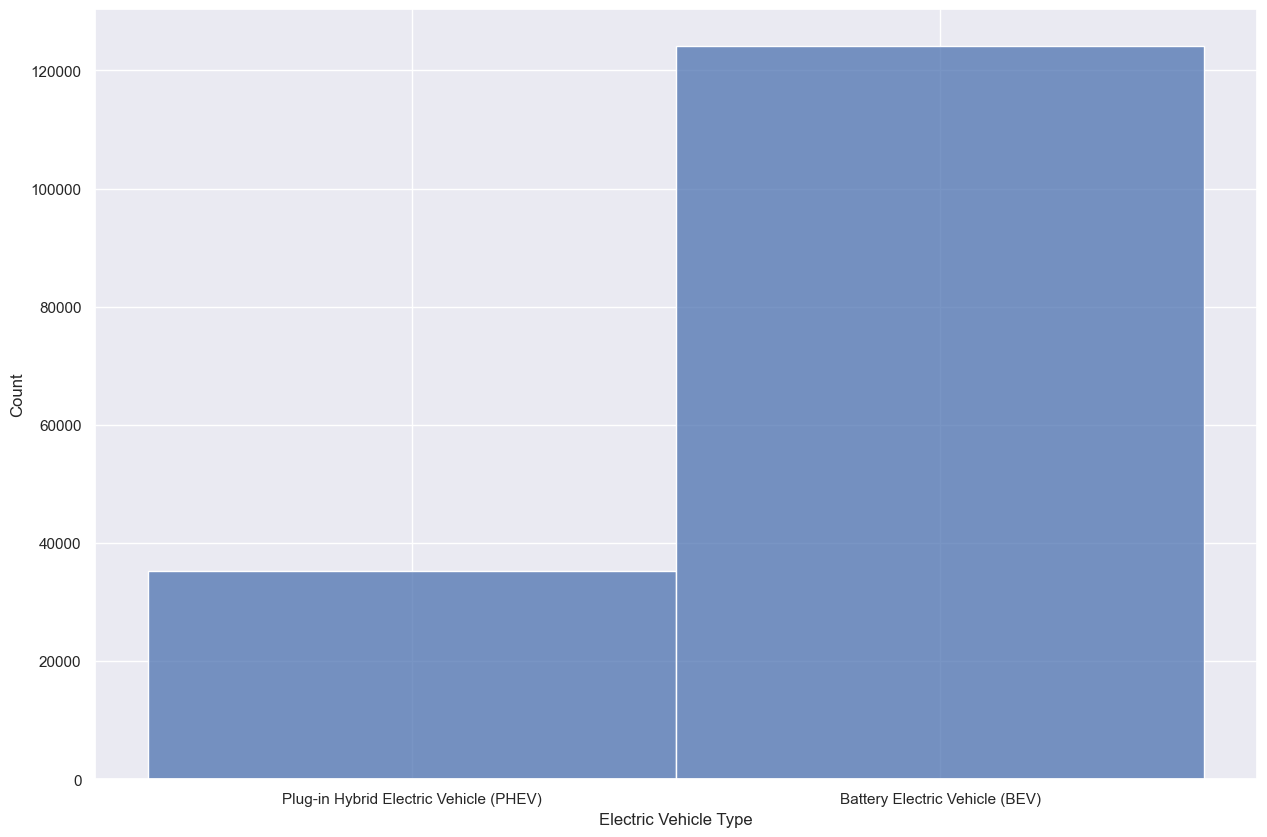

In [122]:
plt.figure(figsize=(15,10))
sns.histplot(eletric['Electric Vehicle Type'])
plt.show()

##### These counts provide insights into the distribution of eletric vehicles based on their Model Year in the dataset.

In [123]:
eletric['Model Year'].value_counts()

2023    45244
2022    27680
2021    18737
2018    14328
2020    11394
2019    10730
2017     8576
2016     5604
2015     4897
2013     4516
2014     3561
2024     1714
2012     1645
2011      780
2010       24
2008       21
2000        8
1999        3
2002        2
1998        1
1997        1
2003        1
Name: Model Year, dtype: int64

### # This plot provide the information about the evolution of electric cars per Year in Washington (1997-2023).

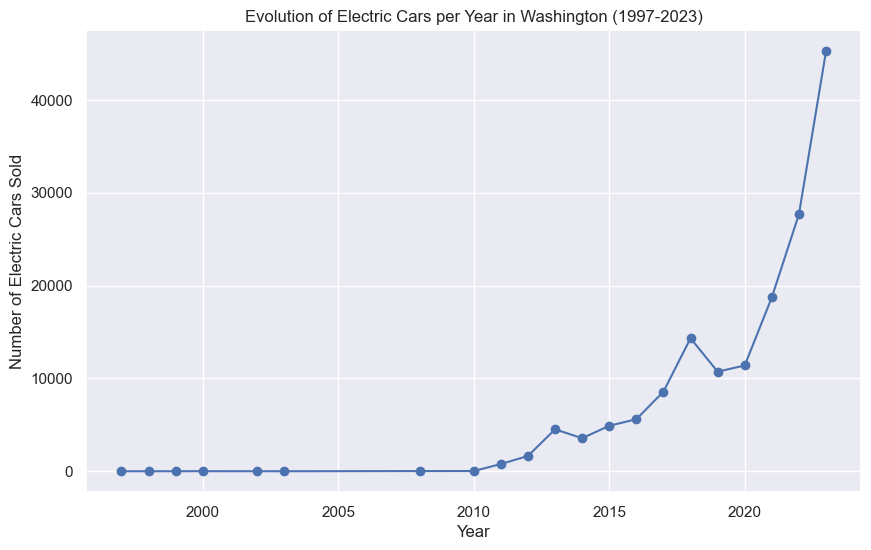

In [124]:
import matplotlib.pyplot as plt

# Assume 'eletric' is the name of your DataFrame
# Make sure you have imported the pandas library and loaded the data correctly

# Filter data until 2023
eletric_until_2023 = eletric[eletric['Model Year'] <= 2023]

# Count of electric cars by year
count_per_year = eletric_until_2023['Model Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(count_per_year.index, count_per_year.values, marker='o', linestyle='-')

# Adding labels and title
plt.title('Evolution of Electric Cars per Year in Washington (1997-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Electric Cars Sold')

# Display the plot
plt.grid(True)
plt.show()

##### This code is creating a bar plot using Seaborn to visualize the count of electric cars in the top 50 counties. It labels each bar with the corresponding count and provides an interpretation related to the main representations in County King.

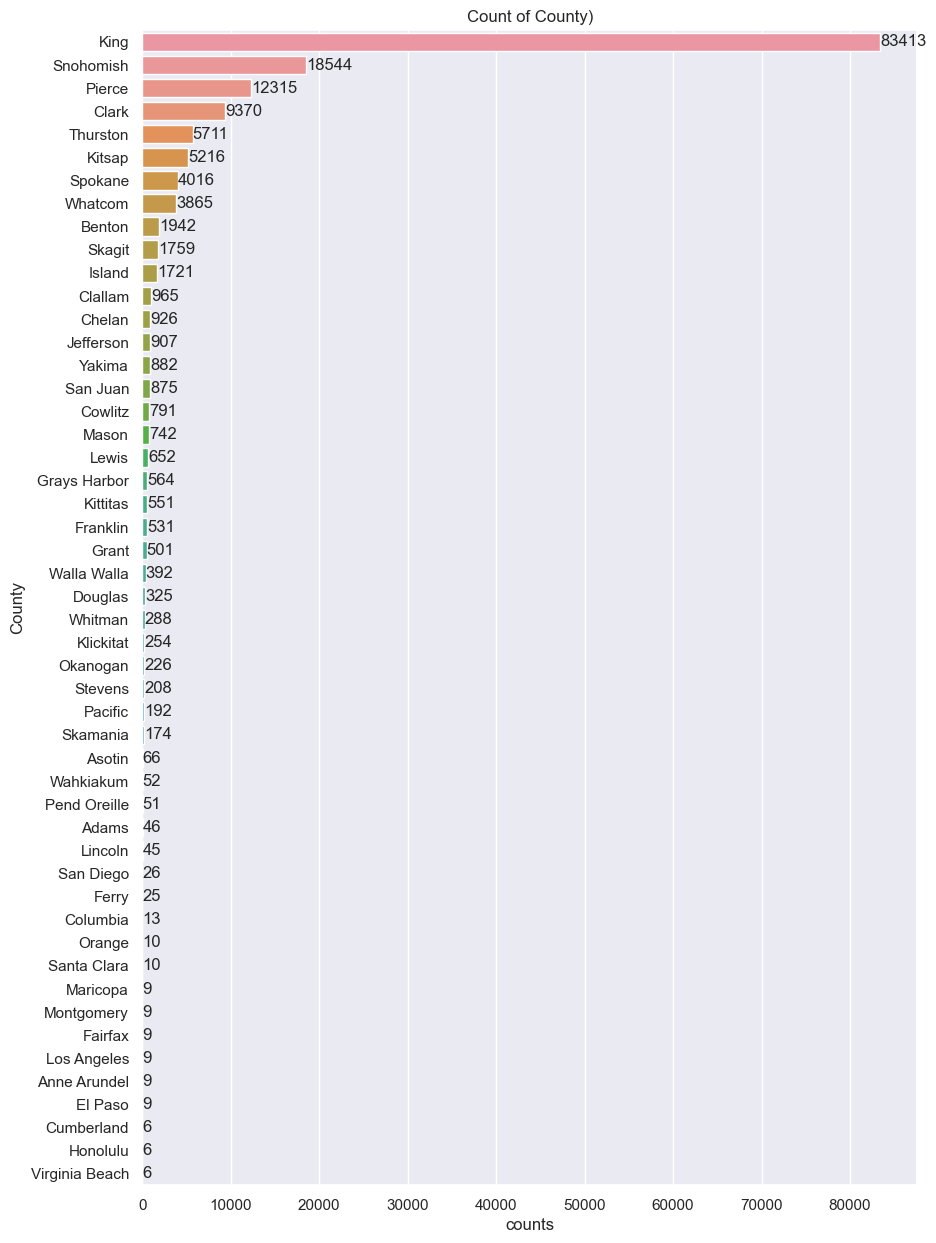

In [125]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='County').size().reset_index(name="counts").sort_values('counts', ascending=False).head(50), 
              y='County', x='counts')
ax.set(title="Count of County)") # title barplot

# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = width+5, # x-coordinate position of data label, padded 5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = "{:.0f}".format(width), # data label, formatted to ignore decimals
    va = "center") # sets vertical alignment (va) to center
    



In [126]:
eletric.shape

(159467, 17)

### Aplying the PCA

Now we are going to execute PCA Model in order to reduce the curse of dimensionality to avoid in this case, specially two things: Computational Complexity -As algorithms need to work exponentially harder as the number of dimensions increases. Increased Sparsity: As dimensions increase, data points become more distant from each other, reducing data density and creating more space between them within the dimensions.
and
Overfitting: The risk of a model capturing random noise as meaningful patterns, particularly when the number of features approaches or exceeds the number of observations.

But there is a challenge, our dataset is based on string (text), in order to run PCA we need to drop these columns or which is more appropriate in this case, handle all categorial values to numeric representation. We learned two different approach to do it on class, one-hot-encoder and label enconder, we are going to use both, depending on the column details, binario or categorical.

In [127]:
columns = eletric.columns
print(columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [128]:
column_types = eletric.dtypes
print(column_types)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

Based on columns type above, we can use label enconding approach to all columns type float64 and int64 and one-hot enconding to columns type object.

In [129]:
# Seleção das colunas numéricas para label encoding
numeric_columns = ['Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                   'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Postal Code',
                   '2020 Census Tract']

# Label encoding para as colunas numéricas
label_encoder = LabelEncoder()
for col in numeric_columns:
    eletric[col] = label_encoder.fit_transform(eletric[col])

# Seleção das colunas categóricas para one-hot encoding
categorical_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Vehicle Location', 'Electric Utility']

# One-hot encoding para as colunas categóricas
eletric_encoded = pd.get_dummies(eletric[categorical_columns])

# Concatenar as variáveis categóricas codificadas com as variáveis numéricas
eletric_final = pd.concat([eletric[numeric_columns], eletric_encoded], axis=1)

# Amostragem de 20% do conjunto de dados
eletric_final_sampled = eletric_final.sample(frac=0.2, random_state=42)

# Padronizar as variáveis
scaler = StandardScaler()
eletric_final_scaled = scaler.fit_transform(eletric_final_sampled)

In [130]:
# Aplicar o PCA com um número menor de componentes
pca = PCA(n_components=10)  # Escolha o número de componentes desejado
eletric_pca = pca.fit_transform(eletric_final_scaled)

# Visualizar a variância explicada cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.00082953 0.00162756 0.0023115  0.00290724 0.00349154 0.00406731
 0.0046407  0.00520598 0.0057699  0.00632807]


Neste caso, o primeiro componente principal explica aproximadamente 0.085% da variância total dos dados, o segundo componente principal explica cerca de 0.171%, e assim por diante. O décimo componente principal explica cerca de 0.63%.

Para avaliar se isso é "bom" ou "ruim", é uma questão de contexto e requisitos específicos do problema. Em geral, quanto maior a porcentagem de variância explicada pelos primeiros componentes principais, melhor, pois significa que esses componentes capturam uma quantidade significativa de informações dos dados originais.

Neste caso, os primeiros componentes principais explicam uma quantidade relativamente muito pequena da variância total. Isso nos indica que os padrões dos nossos dados são complexos e não podem ser totalmente capturados por um número pequeno de componentes principais. Ou seja, os dados podem ter uma estrutura mais complicada que não pode ser bem representada por um PCA com um número pequeno de componentes.

A porcentagem de variância explicada pelos primeiros componentes principais não atendem às nossas necessidades, nós poderiamos considerar aumentar o número de componentes principais, mas esbarramos no uso excessivo de memória que inviabiliou usar 100% do dataset após tentar rodar o PCA + One-hot-encoding para colunas binárias e label_enconding para colunas categóricas afim de converter string em número.

Vamos continuar com a análise do trablho rodando 2 tecnicas de machine learning, mas dado o problema anterior no PCA, não estamos seguros a respeito da acuracidade dos resultados. Vamos descobrir a seguir.

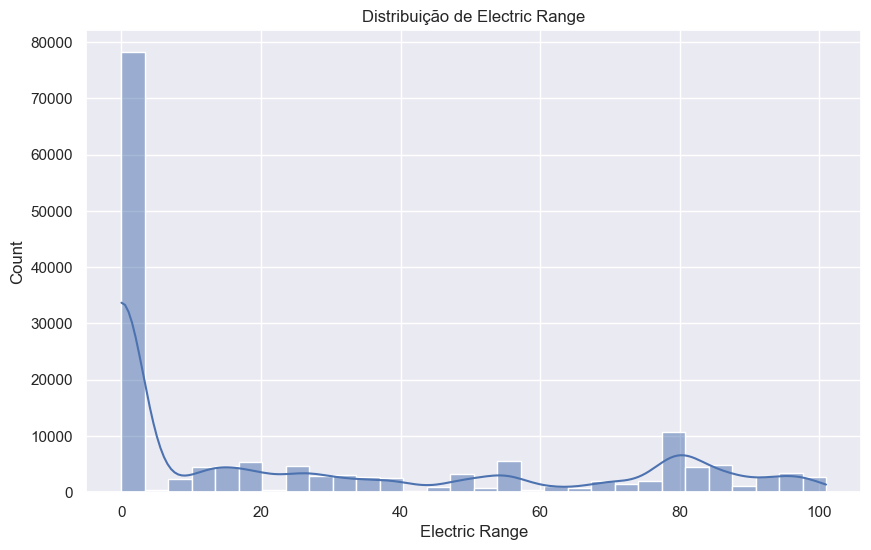

In [131]:
# Histograma para variável Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(eletric['Electric Range'], bins=30, kde=True)
plt.title('Distribuição de Electric Range')
plt.show()

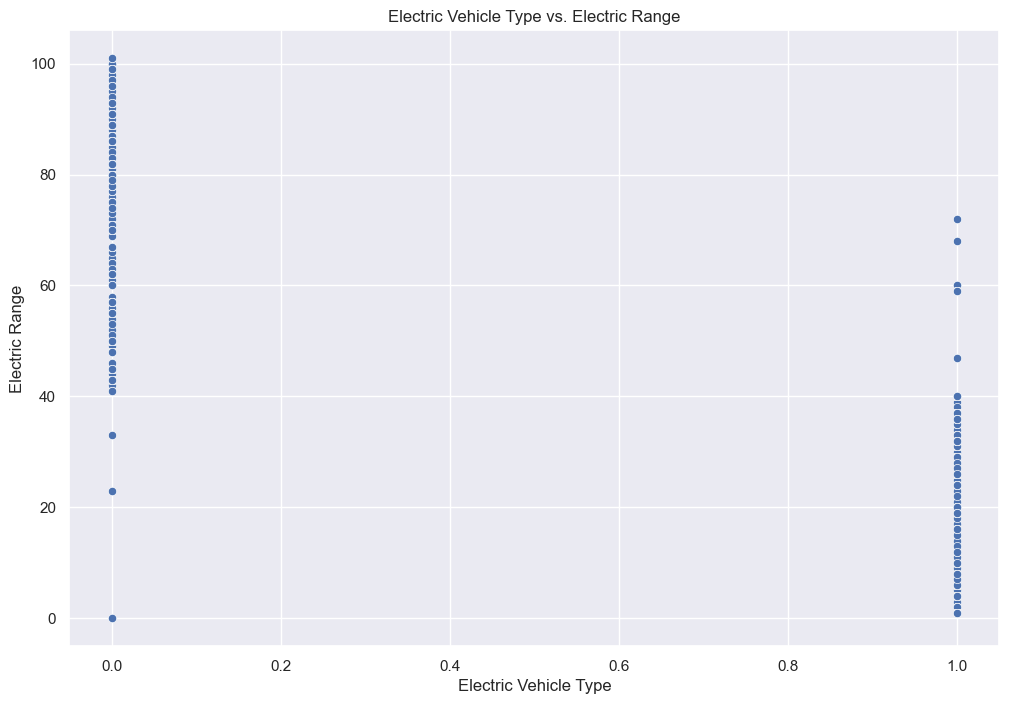

In [132]:
# Scatter plot para Base MSRP vs. Electric Range
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Vehicle Type', y='Electric Range', data=eletric)
plt.title('Electric Vehicle Type vs. Electric Range')
plt.show()

In [133]:
# Verificar nulos
print(eletric.isnull().sum())


VIN (1-10)                                           0
County                                               4
City                                                 4
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     9
Electric Utility                                     4
2020 Census Tract                                    0
dtype: int64


In [134]:
#Pré-processamento dos Dados:
#Vamos tratar as 5 variáveis nulas da coluna "Vehicle Location" e aplicar codificação one-hot-encoding para variáveis categóricas.
# Tratar variáveis nulas
eletric = eletric.dropna(subset=['Electric Range', 'Base MSRP'])
eletric = eletric.fillna(0)  # Preencher nulos com 0 para variáveis numéricas

In [135]:
# Verificar nulos após o tratamento
print(eletric.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

# Selecionar colunas relevantes
eletric = eletric[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
                   'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                   'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                   'Vehicle Location', 'Electric Utility', '2020 Census Tract']]

# Converter todas as colunas para string
eletric = eletric.astype(str)

# Criar pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), selector(dtype_exclude="object")),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), selector(dtype_include="object"))
    ])

# Aplicar pré-processamento
eletric_processed = preprocessor.fit_transform(eletric)

Above, after got a lot of errors, instead of use selec_dttypes to indetify numeric and categorical values we choose to use the command "Columntransformer" to apply the correct transformation based on the type of the columns.

## Objetivos de Modelagem: ##
Modelo de Regressão para Prever Electric Range:
Vamos criar um modelo de regressão para prever a variável Electric Range

In [69]:
# Dividir o conjunto de dados
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [70]:
# Treinar o modelo de Regressão Linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Fazer previsões
y_pred = regression_model.predict(X_test)

In [72]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.36741690346328465


In [73]:
# Dividir o conjunto de dados
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [74]:
# Treinar o modelo de Regressão Linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Fazer previsões
y_pred = regression_model.predict(X_test)

In [76]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.5226081330676545


In [77]:
# Dividir o conjunto de dados
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [78]:
# Treinar o modelo de Regressão Linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Fazer previsões
y_pred = regression_model.predict(X_test)

In [80]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.49796712903588386


In [97]:
# Dividir o conjunto de dados
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [98]:
# Fazer previsões
y_pred = regression_model.predict(X_test)

## Conclusion: ##

O Mean Squared Error (MSE) é uma métrica comum usada para avaliar o desempenho de modelos de regressão. Em termos simples, o MSE mede a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais.
No nosso caso, o MSE é aproximadamente 0.0644. Em geral, valores de MSE mais baixos indicam um melhor ajuste do modelo aos dados. Portanto, um MSE de 0.0644 pode ser considerado bom.
Para interpretar o MSE de uma forma mais intuitiva, podemos considerar que o MSE é uma medida quadrática média dos erros. Quanto mais próximo de zero, melhor. 
Em resumo, um MSE de 0.0644 sugere que o seu modelo de regressão está fazendo previsões razoavelmente boas com base nos dados fornecidos. No entanto, para uma avaliação mais completa, também é útil considerar outras métricas de desempenho, dependendo do contexto do problema.

### Model 2 - Random Forest
Modelo de Classificação para CAFV Eligibility:
Agora, criaremos um modelo de classificação para prever a elegibilidade CAFV. Classificar se um veículo é elegível como Clean Alternative Fuel Vehicle (CAFV) com base nas características do veículo. Abordagem:

UVanos usar Árvores de Decisão, para prever a elegibilidade CAFV com base nas variáveis disponíveis. Vamos Converter a variável alvo "Clean Alternative Fuel Vehicle (CAFV) Eligibility" em uma variável binária (1 para elegível, 0 para não elegível). Vamos avaliar o desempenho do modelo usando métricas de classificação, como precisão, recall e F1-Score.

In [81]:
# Converter a variável alvo em binária (0 ou 1)
eletric['CAFV Eligibility'] = eletric['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: 1 if x == 'Clean Alternative Fuel Vehicle (CAFV) Eligible' else 0)

In [82]:
# Dividir o conjunto de dados
X_classification = eletric_processed
y_classification = eletric['CAFV Eligibility']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [83]:
# Treinar o modelo de Classificação (Random Forest)
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [84]:
# Fazer previsões
y_pred_clf = classification_model.predict(X_test_clf)

In [85]:
# Avaliar o modelo
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [86]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test_clf, y_pred_clf)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31894

    accuracy                           1.00     31894
   macro avg       1.00      1.00      1.00     31894
weighted avg       1.00      1.00      1.00     31894



In [88]:
# Dividir o conjunto de dados
X_classification = eletric_processed
y_classification = eletric['CAFV Eligibility']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.1, random_state=42)

In [89]:
# Treinar o modelo de Classificação (Random Forest)
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [90]:
# Fazer previsões
y_pred_clf = classification_model.predict(X_test_clf)

In [91]:
# Avaliar o modelo
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [92]:
# Dividir o conjunto de dados
X_classification = eletric_processed
y_classification = eletric['CAFV Eligibility']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [93]:
# Treinar o modelo de Classificação (Random Forest)
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [94]:
# Fazer previsões
y_pred_clf = classification_model.predict(X_test_clf)

In [95]:
# Avaliar o modelo
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


### Conclusion:
The result "Accuracy: 1.0" shows that our model of classification Random Forest got an accuracy of 100%, it means that all forecast made by this model matched with the real label on the dataset. In other words, this model for this dataset and this goal, witch is classify if the vehicle is eligeble as an Clean Alternative Fuel Vehicle is 100% of accuracy.